<a href="https://colab.research.google.com/github/Rafal-Wawrzak/Project_2/blob/main/Project_2_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Items

In [1]:
!pip install dython

In [2]:
import pandas as pd
import numpy as np
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from dython import nominal

In [3]:
path  =  '/content/drive/MyDrive/Boot  Camp/Project two/agaricus-lepiota.data'


In [4]:
def printNull(dataFrame):
    '''
    prints the Nulls in a Data Set
    '''
    print(dataFrame.isnull().sum())

def dataFrameValuesCounts(dataFrame):
    for i in dataFrame:
        print(f'------ {i} ------')
        print('\n\n')
        print(dataFrame[i].value_counts())
        print('-------------------')

In [5]:
def barGroupCount(dataFrame, mainColumn, secoundColumn= None,plot = 'bar',titleFontSize = 25,  tickSize = 10, labelSize = 25, figureSize = (12, 10),y_rot = 0,  x_rot = 0,gridAxis = 'y'):
    if secoundColumn == None:
        for i in dataFrame:
            plt.figure(figsize = figureSize)
            plt.title(f'This graph shows  the count by {i}',
                      fontsize = titleFontSize)
            plt.ylabel('Count',
                       fontsize = labelSize)
            plt.yticks(fontsize=tickSize,
                       rotation = y_rot)
            plt.xlabel(i,
                       fontsize = labelSize)
            plt.xticks(fontsize=tickSize,
                       rotation = x_rot)
            plt.legend()
            plt.grid(axis = gridAxis)
            dataFrame.groupby(i)[i].count().plot(kind=plot)
            plt.show()
            print(i)    
    else:
        dataFrame.groupby(mainColumn).count().plot(kind = plot)

#data dictionary
|Cloumn Name| What it represents|
|---|---|
|class|Edible = e, poisonous = p|
|cap-shape|bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s|
|cap-surface|fibrous=f,grooves=g,scaly=y,smooth=s|
|cap-color|brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y|
|bruises?|bruises=t,no=f|
| odor|almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s|
|gill-attachment|attached=a,descending=d,free=f,notched=n|
| gill-spacing|close=c,crowded=w,distant=d|
|gill-size|broad=b,narrow=n|
| gill-color|black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y|
| stalk-shape|enlarging=e,tapering=t|
| stalk-root|bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?|
|stalk-surface-above-ring|fibrous=f,scaly=y,silky=k,smooth=s|
| stalk-surface-below-ring|fibrous=f,scaly=y,silky=k,smooth=s|
|stalk-color-above-ring|brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
|stalk-color-below-ring|brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y|
|veil-type|partial=p,universal=u|
|veil-color|brown=n,orange=o,white=w,yellow=y|
|ring-number|none=n,one=o,two=t|
|ring-type|cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z|
|spore-print-color|black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y|
|population|abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y|
|habitat|grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d|

deleted unnecessary columns

-deleted duplicate rows --- DONE ----

-identified and addressed missing values --- DONE ----

-identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats) --- DONE ----

-produced univariate visuals for the target and all features --- DONE ----

-identified outliers --- DONE ----

-produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another 

-clearly commented all of your cleaning steps and described any decisions you made  (Note: During the final stack of the program, you will be making a presentation for a technical audience that includes your decisions and process in the cleaning steps. The more notes you take now, the easier that presentation will be. To clarify, that presentation is NOT due now.) --- DONE ----

#Adding Dataframe

In [6]:
df = pd.read_csv(path,
                 sep=',',
                 header =  None)

In [7]:
df.columns= ['class',
             'cap-shape',
             'cap-surface',
             'cap-color',
             'bruises',
             'odor',
             'gill-attachment',
             'gill-spacing',
             'gill-size',
             'gill-color',
             'stalk-shape',
             'stack-root',
             'stalk-surface-above-ring',
             'stalk-surface-below-ring',
             'stalk-color-above-ring',
             'stalk-color-below-ring',
             'veil-type',
             'veil-color',
             'ring-number',
             'ring-type',
             'spore-print-color',
             'population',
             'habitat']

In [8]:
printNull(df)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stack-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stack-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stack-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


#converting letter, to name for clearification

In [11]:
##slowly changing from letter to words so i can understand  the data better
df['class'] = df ['class'].map({'e':'Edible',
                                'p':'Poisonous'})

df['cap-shape'] = df['cap-shape'].map({'b':'bell',
                                       'c':'conical',
                                       'x':'convex',
                                       'f':'flat',
                                       'k':'knobbed',
                                       's':'sunken'})

df['cap-surface']=df['cap-surface'].map({'f':'fibrous',
                                         'g':'grooves',
                                         'y':'scaly',
                                         's':'smooth'})


#more coding

In [12]:
dataFrameValuesCounts(df)

------ class ------



Edible       4208
Poisonous    3916
Name: class, dtype: int64
-------------------
------ cap-shape ------



convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap-shape, dtype: int64
-------------------
------ cap-surface ------



scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap-surface, dtype: int64
-------------------
------ cap-color ------



n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
-------------------
------ bruises ------



f    4748
t    3376
Name: bruises, dtype: int64
-------------------
------ odor ------



n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
-------------------
------ gill-attachment ------



f    7914
a     210
Name: gill-attachment, dtype: int64
-------------------
------ gill-spacing ------



c    6812
w

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stack-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [22]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stack-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,convex,smooth,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,Edible,convex,smooth,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,Edible,bell,smooth,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,Poisonous,convex,scaly,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,Edible,convex,smooth,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,Edible,knobbed,smooth,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,Edible,convex,smooth,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,Edible,flat,smooth,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,Poisonous,knobbed,scaly,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [23]:
boo =[]
for i in df:
    boo.append(i)

In [24]:
print(boo)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stack-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


Umm i found a way to make a heat map from catagorical data...

URL: https://github.com/shakedzy/dython/issues/2

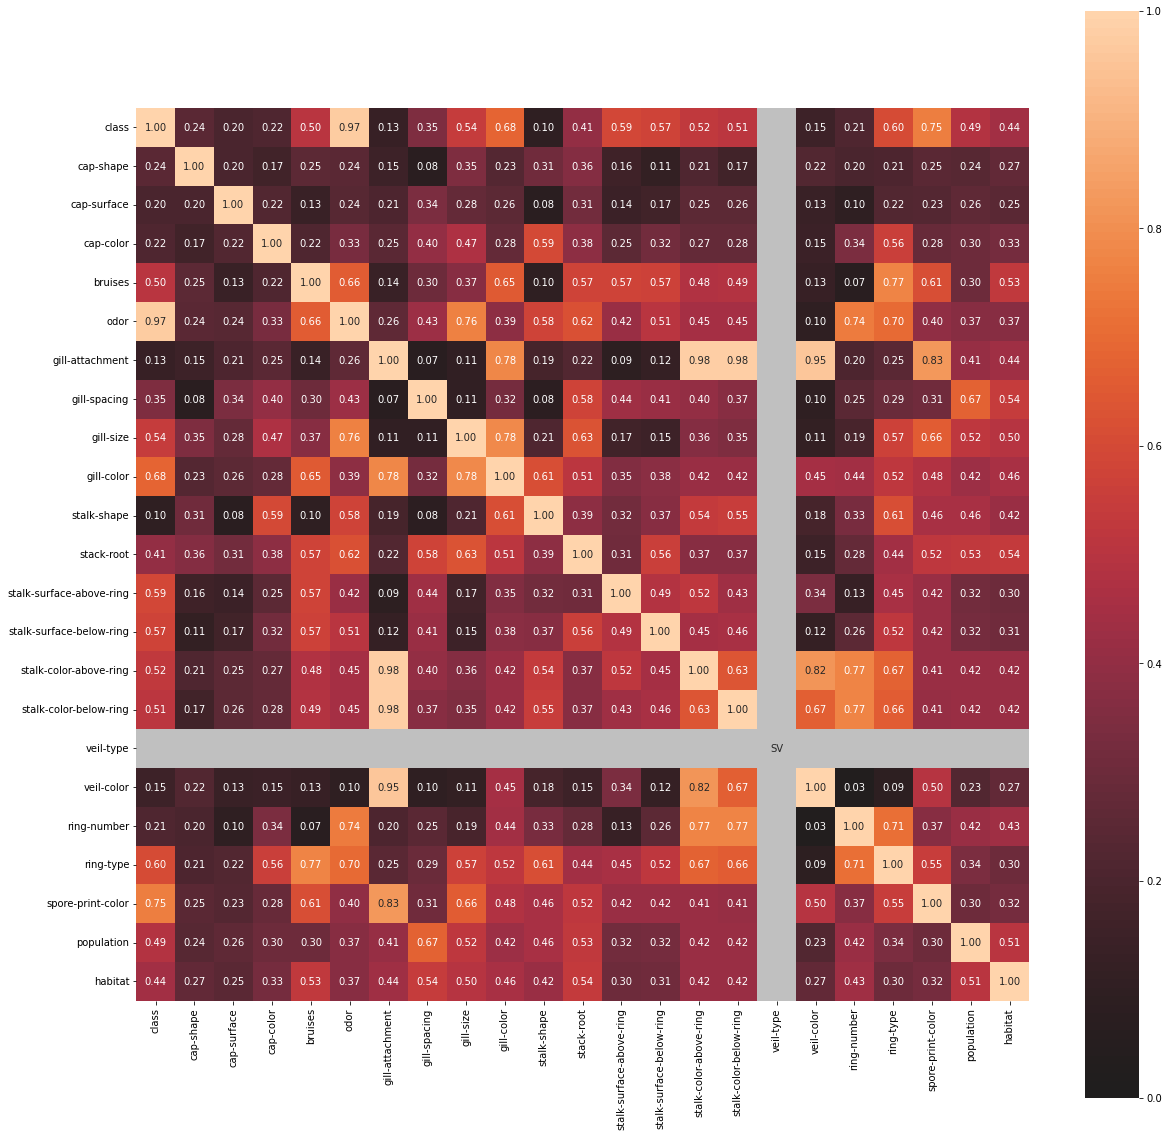

{'ax': <AxesSubplot:>,
 'corr':                              class  cap-shape  ...  population   habitat
 class                     1.000000   0.244330  ...    0.486775  0.439323
 cap-shape                 0.244330   1.000000  ...    0.240074  0.269842
 cap-surface               0.195997   0.202242  ...    0.260952  0.249577
 cap-color                 0.215889   0.168221  ...    0.304085  0.325199
 bruises                   0.501188   0.254415  ...    0.299568  0.530257
 odor                      0.970558   0.243577  ...    0.373698  0.368861
 gill-attachment           0.127951   0.152989  ...    0.413362  0.435707
 gill-spacing              0.347897   0.077849  ...    0.673533  0.541961
 gill-size                 0.539677   0.345956  ...    0.517249  0.498616
 gill-color                0.679877   0.232274  ...    0.423513  0.457212
 stalk-shape               0.101170   0.306119  ...    0.455486  0.417101
 stack-root                0.406224   0.359388  ...    0.529233  0.536186
 stalk-

In [28]:
nominal.associations(df, 
                     nominal_columns=boo,
                     figsize = (20,20))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stack-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [30]:
dataFrameValuesCounts(df)

------ class ------



Edible       4208
Poisonous    3916
Name: class, dtype: int64
-------------------
------ cap-shape ------



convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap-shape, dtype: int64
-------------------
------ cap-surface ------



scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap-surface, dtype: int64
-------------------
------ cap-color ------



n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
-------------------
------ bruises ------



f    4748
t    3376
Name: bruises, dtype: int64
-------------------
------ odor ------



n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
-------------------
------ gill-attachment ------



f    7914
a     210
Name: gill-attachment, dtype: int64
-------------------
------ gill-spacing ------



c    6812
w

In [ ]:
%%time
barGroupCount(df,
              'class',
              plot='bar',
              tickSize=20,
              x_rot= 50)

#Splitting 


In [ ]:
df.duplicated().sum()

In [ ]:
df.info()

In [ ]:
y = df['class']
X = df.drop(columns = ['class', 'veil-type'])# dropping Veil-type only cause it's all the same 

X_train , X_test, y_train, y_test = train_test_split(X, y,random_state=42)